#📌 Extracão

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

In [2]:
df_raw = pd.json_normalize(data)
df_raw.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [3]:
df_raw.info()
df_raw.describe(include="object")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [4]:
df = df_raw.copy()

df.columns = (
    df.columns
    .str.lower()
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

In [5]:
df.isnull().sum()

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [6]:
df.fillna({
    'totalcharges': 0
}, inplace=True)

In [7]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

#📊 Carga e análise

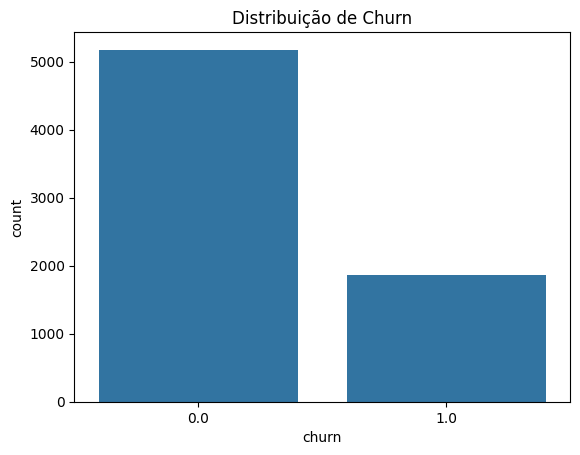

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title("Distribuição de Churn")
plt.show()

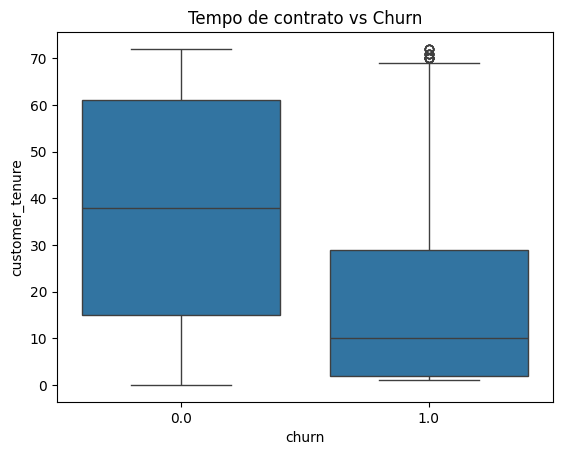

In [9]:
sns.boxplot(x='churn', y='customer_tenure', data=df)
plt.title("Tempo de contrato vs Churn")
plt.show()

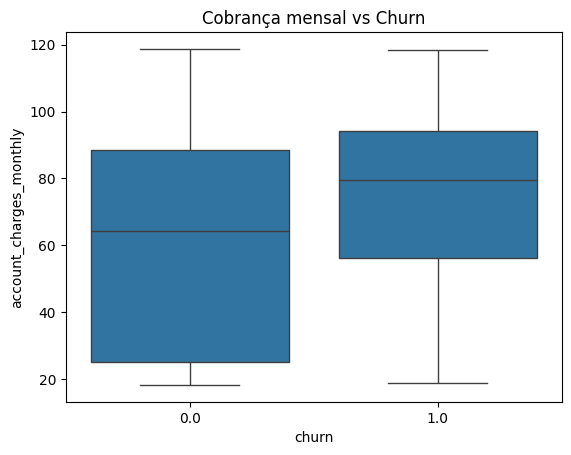

In [10]:
sns.boxplot(x='churn', y='account_charges_monthly', data=df)
plt.title("Cobrança mensal vs Churn")
plt.show()

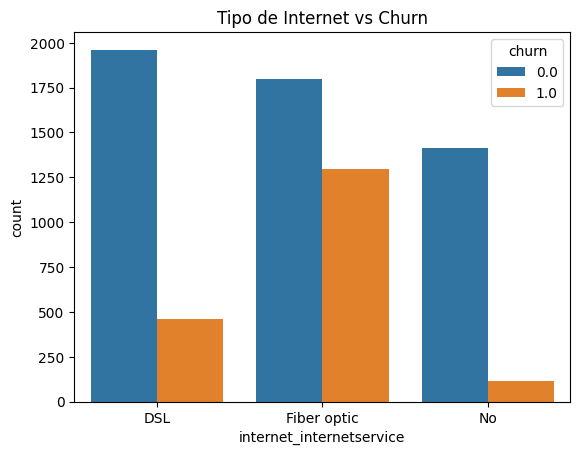

In [11]:
sns.countplot(x='internet_internetservice', hue='churn', data=df)
plt.title("Tipo de Internet vs Churn")
plt.show()

#📄Relatorio Final

## 📌 Conclusão

A análise exploratória permitiu identificar alguns padrões relevantes associados à evasão
de clientes:

- Clientes com menor tempo de contrato tendem a apresentar maior taxa de churn.
- Planos com cobranças mensais mais elevadas apresentam maior incidência de cancelamento.
- O tipo de serviço contratado influencia diretamente na evasão.

Esses insights podem auxiliar a empresa Telecom X na criação de estratégias direcionadas
para retenção de clientes e na construção de modelos preditivos mais eficientes.